# EmagPy Quick start
In this tutorial you will learn how to import and processes EMI data with the emagpy API (Application Progamming Interface).

## Data import
After importing the module we will import the file `coverCrop.csv` from the test folder.

In [10]:
# let's first import EmagPy module
import os
import numpy as np
os.chdir('/media/jkl/data/phd/tmp/pyScripts')
from emagpy import Problem

k = Problem() # this create the main object
k.createSurvey('emagpy/test/coverCrop.csv') # this import the data

The data are usually imported from a .csv file with the headers being the coil configuration. Below is an example of the `coverCrop.csv` file.

In [11]:
import pandas as pd
df = pd.read_csv('emagpy/test/coverCrop.csv')
df.head() # see how the header are formatted

,x,y,VCP0.32,VCP0.71,VCP1.14,VCP0.32_inph,VCP0.71_inph,VCP1.14_inph,HCP0.32,HCP0.71,HCP1.14,HCP0.32_inph,HCP0.71_inph,HCP1.14_inph
0,0,0,34.090222,34.67,38.32,1.79,1.90,2.13,33.53,39.77,45.22,2.13,2.27,2.68
1,1,0,35.350111,36.69,40.16,1.79,1.87,2.13,39.72,43.81,46.76,2.20,2.30,2.72
2,2,0,36.680000,35.79,39.21,1.81,1.87,2.14,36.10,40.63,45.16,2.14,2.29,2.71
3,3,0,41.960556,34.26,37.43,1.76,1.30,2.12,35.64,39.47,41.97,2.18,2.22,2.63
4,4,0,29.250444,28.91,33.51,1.79,1.92,2.19,32.46,36.36,40.58,2.23,2.24,2.69


# Data visualization
You can use the `Problem.show()` function to visualize the data as a line graph. Additionnaly if spatial coordinates are in the csv file (columns x an y). A map can also be produced using `Problem.showMap()`.

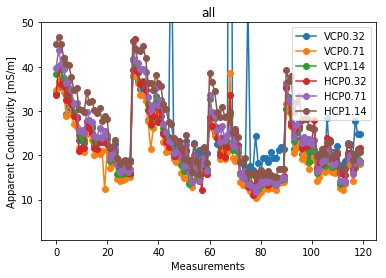

In [12]:
k.show(vmax=50)

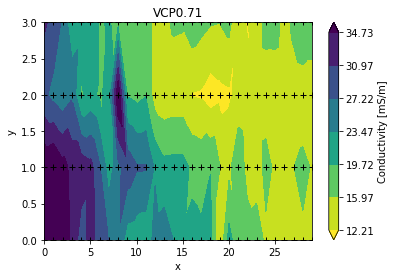

In [13]:
k.showMap(coil='VCP0.71', contour=True, pts=True)

## Data inversion
To invert the data we must first define a starting model with a given number of layers and a starting conductivity in mS/m.

In [16]:
k.depths0 = np.array([0.2, 0.5]) # specify the BOTTOM of each layer (the last layer is infinite)
k.conds0 = np.ones(len(k.depths0)+1)*30 # conductivity in mS/m

Then there are 3 different inversion schemes availables:
- `invertGN()`: a fast Guass-Newton solver for smooth multi-layer problem
- `invert()` : the general to go method that allows different forward models and minimize an objective function
- `invertQ()` : a minimization inversion based on the quadrature (better for high EC (> 100 mS/m) problem

The inverted section can be seen using `showResults()` and `showSlice()` if spatial data are available. The quality of the inversion can be assessed using `showMisfit()` and `showOne2one()`.

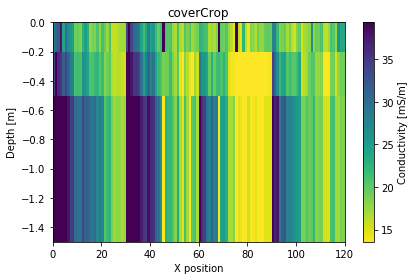

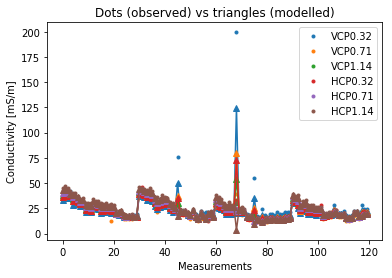

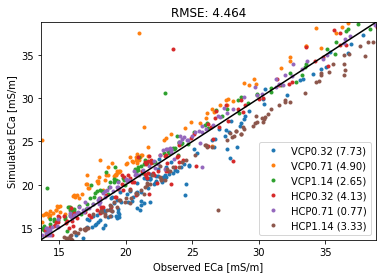

In [28]:
# Gauss-Newton fast inversion
k.invertGN(dump=lambda x:x)
k.showResults()
k.showMisfit()
k.showOne2one()

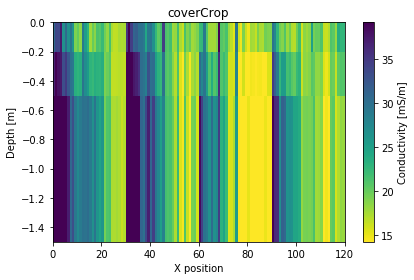

In [29]:
# Inversion based on minimization of objective function
k.invert(dump=lambda x:x)
k.showResults()

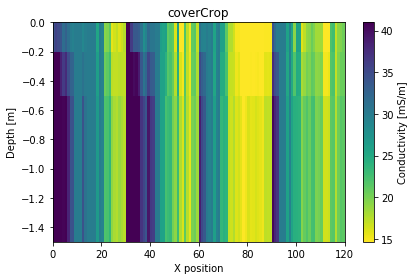

In [30]:
# quadrature (Q) based inversion (takes longer)
k.invertQ(dump=lambda x:x)
k.showResults()

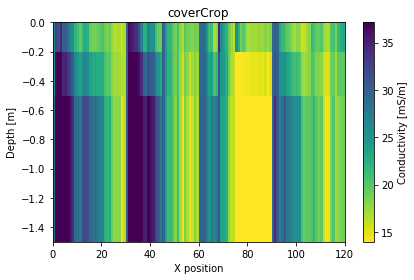

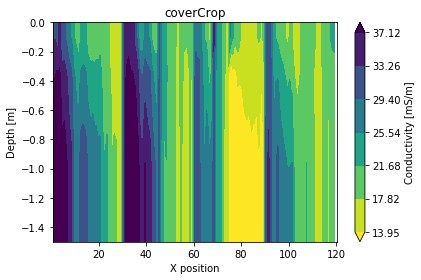

In [27]:
k.invert(alpha=0.07, beta=0.5, dump=lambda x:x) # alpha controls the vertical smoothing while beta the lateral smoothing
k.showResults()
k.showResults(contour=True)

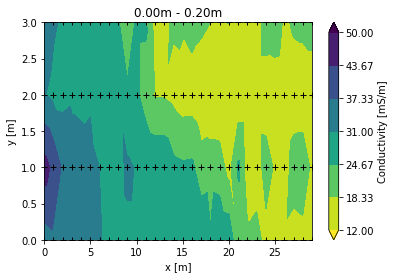

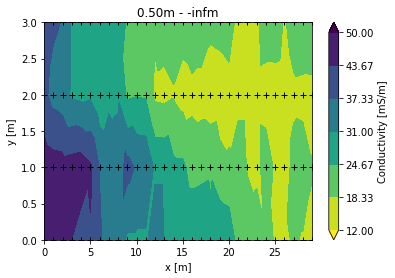

In [36]:
k.showSlice(islice=0, contour=True, vmin=12, vmax=50)
k.showSlice(islice=2, contour=True, vmin=12, vmax=50)

In [33]:
help(k.showSlice) # how to access the help for each method

Help on method showSlice in module emagpy.Problem:

showSlice(index=0, islice=0, contour=False, vmin=None, vmax=None, cmap='viridis_r', ax=None) method of emagpy.Problem.Problem instance
    Show depth slice.
    
    Parameters
    ----------
    index : int, optional
        Survey index. Default is first.
    islice : int, optional
        Depth index. Default is first depth.
    contour : bool, optional
        If `True` then there will be contouring.
    vmin : float, optional
        Minimum value for colorscale.
    vmax : float, optional
        Maximum value for colorscale.
    cmap : str, optional
        Name of colormap. Default is viridis_r.
    ax : Matplotlib.Axes, optional
        If specified, the graph will be plotted against it.

